# Deep Learning for Computer Vision

### Cat vs Dog Classification

![capture](https://user-images.githubusercontent.com/13174586/49722804-86fa3b80-fc8b-11e8-8591-c103d383291e.JPG)


#### Download Data
This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, we’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class. [Kaggle Cat-Dog Data Link](www.kaggle.com/c/dogs-vs-cats/data)

#### Copying images to training, validation, and test directories

In [1]:
import os, shutil

original_dataset_dir= 'C:/Users/soumyama/Documents/Python Scripts/Keras/Cat_Dog/train'
base_dir= 'C:/Users/soumyama/Documents/Python Scripts/Keras/Cat_Dog/data/'
os.mkdir(base_dir)


#Create Train, Validation and test data sets
train_dir= os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir= os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir= os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Directory with training cat images
train_cats_dir= os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#Directory with training dog images
train_dogs_dir= os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#Directory with validation cat images
validation_cats_dir= os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#Directory with validation dog images
validation_dogs_dir= os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Directory with test cat images
test_cats_dir= os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#Directory with test dog images
test_dogs_dir= os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#Copy the first 1,000 cat images to train_cats_dir
fnames= ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

#Copy the next 500 cat images to validation_cats_dir
fnames= ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
#Copy the next 500 cat images to test_cats_dir
fnames= ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)

    

#Copy the first 1,000 dog images to train_dogs_dir
fnames= ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

#Copy the next 500 cat images to validation_dogs_dir
fnames= ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
#Copy the next 500 cat images to test_dogs_dir
fnames= ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir, fname)
    dst=os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

**Sanity check**: Let’s count how many pictures are in each training split (train/validation/test):

In [2]:
print("Total Cat Training Images  : ", len(os.listdir(train_cats_dir)))
print("Total Dog Training Images  : ", len(os.listdir(train_dogs_dir)))
print("Total Cat Validation Images: ", len(os.listdir(validation_cats_dir)))
print("Total Dog Validation Images: ", len(os.listdir(validation_dogs_dir)))
print("Total Cat Test Images      : ", len(os.listdir(test_cats_dir)))
print("Total Dog Test Images      : ", len(os.listdir(test_dogs_dir)))

Total Cat Training Images  :  1000
Total Dog Training Images  :  1000
Total Cat Validation Images:  500
Total Dog Validation Images:  500
Total Cat Test Images      :  500
Total Dog Test Images      :  500


So we do indeed have 2,000 training images, 1,000 validation images, and 1,000 test images. Each split contains the same number of samples from each class: this is a balanced
binary-classification problem, which means classification accuracy will be an appropriate measure of success.

### Build Network

The convnet will be a stack of alternated ```Conv2D``` (with *relu activation*) and ```MaxPooling2D``` layers. But because we’re dealing with bigger images and a more complex problem, we’ll make our network larger, accordingly: it will have one more ```Conv2D + MaxPooling2D``` stage. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so they aren’t overly large when we reach the ```Flatten``` layer. Here, because we start from inputs of size 150 × 150 (a somewhat arbitrary choice), we end up with feature maps of size 7 × 7 just before the ```Flatten``` layer.

>**NOTE:** The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from 148 × 148 to 7 × 7). This is a pattern we’ll see in almost all convnets.

Because we’re attacking a binary-classification problem, we’ll end the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

#### Instantiating a small convnet for dogs vs. cats classification

In [3]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

For the compilation step, we’ll go with the ```RMSprop``` optimizer, as usual. Because we ended the network with a single ``sigmoid`` unit, we’ll use ```binary_crossentropy``` as the loss.

#### Configure The Model for Training

In [4]:
from keras import optimizers

model.compile(optimizer= optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

#### Data Preprocessing
Data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
 - Read the picture files.
 - Decode the JPEG content to RGB grids of pixels.
 - Convert these into floating-point tensors.
 - Rescale the pixel values (between 0 and 255) to the ```[0, 1]``` interval (as we know, neural networks prefer to deal with small input values).
 
Keras has a module with image-processing helper tools, located at ```keras.preprocessing.image```. In particular, it contains the class ```ImageDataGenerator```, which lets us quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

#### Use ImageDataGenerator to read images from directories

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(rescale=1./255) #Rescale images by 1/255

train_generator= datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode= 'binary')

validation_generator= datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode= 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: it yields batches of 150 × 150 RGB images *(shape (20, 150, 150, 3)*) and binary labels *(shape (20,))*. There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, we need to break the iteration loop at some point

In [6]:
for data_batch, labels_batch in train_generator:
    print("Data batch shape  : ", data_batch.shape)
    print("Labels batch shape: ", labels_batch.shape)
    break

Data batch shape  :  (20, 150, 150, 3)
Labels batch shape:  (20,)


Let’s fit the model to the data using the generator. You do so using the ```fit_generator``` method, the equivalent of ```fit``` for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the ```steps_per_epoch argument```: after having drawn ```steps_per_epoch``` batches from the generator—that is, after having run for ```steps_per_epoch``` gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until we see our target of 2,000 samples.

When using ```fit_generator```, we can pass a ```validation_data``` argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If we pass a generator as ```validation_data```, then this generator is expected to yield batches of validation data endlessly; thus we should also specify the ```validation_steps``` argument, which tells the process how many batches to draw from the validation generator for evaluation.

#### Fit The Model Using a Batch Generator

In [7]:
history= model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                             validation_data= validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 143ms/step - loss: 0.6912 - acc: 0.5400 - val_loss: 0.6802 - val_acc: 0.5170
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6548 - acc: 0.6235 - val_loss: 0.6503 - val_acc: 0.5980
Epoch 3/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6140 - acc: 0.6610 - val_loss: 0.6409 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5677 - acc: 0.7095 - val_loss: 0.6153 - val_acc: 0.6520
Epoch 5/30
100/100 [==============================] - 6s 58ms/step - loss: 0.5399 - acc: 0.7260 - val_loss: 0.5712 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 6s 58ms/step - loss: 0.5113 - acc: 0.7595 - val_loss: 0.5626 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 6s 58ms/step - loss: 0.4790 - acc: 0.7700 - val_loss: 0.5453 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 6s 58ms/step 

It’s good practice to always save the models after training.

#### Save The Model

In [8]:
model.save('cats_and_dogs_small_1.h5')

Let’s plot the loss and accuracy of the model over the training and validation data during training

#### Display Curves of Loss And Accuracy During Training

In [10]:
import matplotlib.pyplot as plt

acc= history.history['acc']
loss= history.history['loss']
val_acc= history.history['val_acc']
val_loss= history.history['val_loss']

epochs= range(1, len(acc)+1)

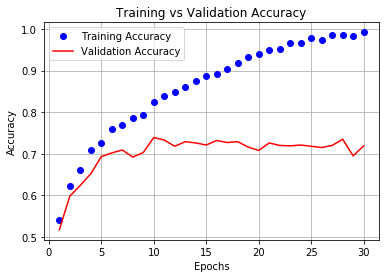

In [11]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', color='red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

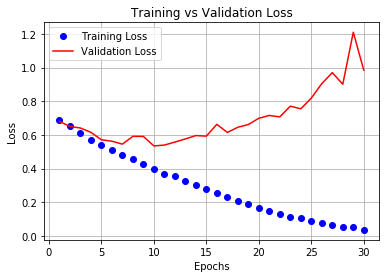

In [13]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', color= 'red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid()
plt.legend()
plt.show()

These plots are characteristic of **overfitting**. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0. 

Because we have relatively few training samples (2,000), overfitting will be your number-one concern. We already know about a number of techniques that can help mitigate overfitting, such as ```dropout``` and ```weight decay (L2 regularization)```. We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: ```data augmentation```.

#### Using data augmentation
Overfitting is caused by having too few samples to learn from, rendering we unable to train a model that can generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by **augmenting** the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ```ImageDataGenerator``` instance.

#### Setup a Data Augmentation Configuration via ```ImageDataGenerator```

In [26]:
datagen= ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                           shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

These are just a few of the options available:
 - **rotation_range** is a value in degrees (0–180), a range within which to randomly rotate pictures.
 - **width_shift** and **height_shift** are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
 - **shear_range** is for randomly applying shearing transformations.
 - **zoom_range** is for randomly zooming inside pictures.
 - **horizontal_flip** is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
 - **fill_mode** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
 
#### Display Some Randomly Augmented Training Images

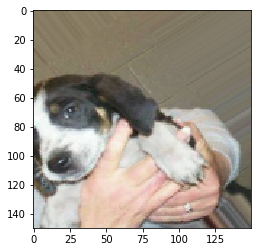

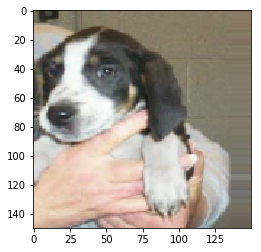

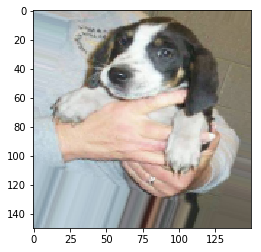

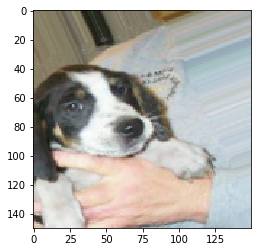

In [34]:
from keras.preprocessing import image # Module for Image Processing utilities

fnames= [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

img_path= fnames[2] #Taking one image for augmentation

img= image.load_img(img_path, target_size=(150,150)) #Reads the image and resize it

x= image.img_to_array(img) #Converts to a numpy array of shape (150,150,3)

x= x.reshape((1,) + x.shape) # Reshape to (1,150,150,3)

i=0
#Generates batches of randomly transformed images. Loops indefinitely, need to break the loop at some point!
for batch in datagen.flow(x, batch_size=1): 
    plt.figure(i)
    imgplot= plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

If we train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images— we can’t produce
new information, we can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, we’ll also add a ```Dropout``` layer to the model, right before the densely connected classifier.

#### Define a New Convnet That Includes Dropout

In [37]:
model= models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [38]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

#### Train The Convnet Using Data-Augmentation Generators

In [40]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=40, 
                                 width_shift_range=0.2, height_shift_range=0.2,
                                 zoom_range=0.2, shear_range=0.2, horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255) #Validation Data should not be augmented

train_generator= train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150), #Resizes all images to 150 × 150
        batch_size=32,
        class_mode='binary') #Because we use binary_crossentropy loss, we need binary labels.

validation_generator= test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150), #Resizes all images to 150 × 150
        batch_size=32,
        class_mode='binary') #Because we use binary_crossentropy loss, we need binary labels.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
history= model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                             validation_data= validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 197ms/step - loss: 0.6915 - acc: 0.5144 - val_loss: 0.6729 - val_acc: 0.5787
Epoch 2/30
100/100 [==============================] - 18s 180ms/step - loss: 0.6744 - acc: 0.5644 - val_loss: 0.6476 - val_acc: 0.6005
Epoch 3/30
100/100 [==============================] - 18s 181ms/step - loss: 0.6611 - acc: 0.5947 - val_loss: 0.6381 - val_acc: 0.6168
Epoch 4/30
100/100 [==============================] - 18s 180ms/step - loss: 0.6456 - acc: 0.6116 - val_loss: 0.6552 - val_acc: 0.5896
Epoch 5/30
100/100 [==============================] - 18s 181ms/step - loss: 0.6303 - acc: 0.6322 - val_loss: 0.6883 - val_acc: 0.5901
Epoch 6/30
100/100 [==============================] - 18s 181ms/step - loss: 0.6098 - acc: 0.6597 - val_loss: 0.5906 - val_acc: 0.6682
Epoch 7/30
100/100 [==============================] - 18s 180ms/step - loss: 0.6047 - acc: 0.6731 - val_loss: 0.7494 - val_acc: 0.5635
Epoch 8/30
100/100 [==============================] - 1

#### Save The Model

In [42]:
model.save('cats_and_dogs_small_2.h5')

#### Display Curves of Loss And Accuracy During Training

In [43]:
import matplotlib.pyplot as plt

acc= history.history['acc']
loss= history.history['loss']
val_acc= history.history['val_acc']
val_loss= history.history['val_loss']

epochs= range(1, len(acc)+1)

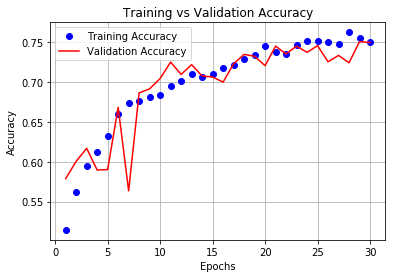

In [44]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', color='red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

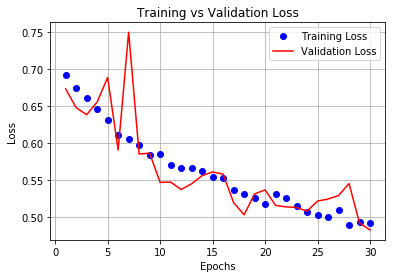

In [45]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', color='red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid()
plt.legend()
plt.show()